In [23]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')
dados.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [5]:
dados.drop(columns=["CUST_ID", "TENURE"], inplace=True)

In [6]:
dados.fillna(dados.median(), inplace = True)

In [7]:
dados.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [8]:
dados.fillna(dados.median(), inplace = True)

In [9]:
values = Normalizer()
normalize = values.fit_transform(dados.values)
print(normalize)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [10]:
#Normalmente se divide os dados de treino e teste antes de treinar o modelo

kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(normalize)
y_pred

array([2, 3, 2, ..., 2, 2, 1], dtype=int32)

In [11]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(normalize, labels, metric = 'euclidean')
silhouette #o resultado dessa métrica se for um valor positivo, é um bom indicativo, e deve estar entre [-1, 1].

0.36454479258047573

In [12]:
dbs = metrics.davies_bouldin_score(normalize, labels)
print(dbs) #quanto mais próximo de zero, o output desse código, melhor o resultado da clusterização

1.0760464906093192


In [13]:
#Índice calinski
calinski = metrics.calinski_harabasz_score(normalize, labels)
calinski #o objetivo é ter um valor bem alto

3431.7903477169225

In [14]:
#Criamos essa função para criar resultados para comparar com o nosso modelo, criamos um 'baseline'
def algoritmo_baseline(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [15]:
s1, dbs1, calinski1 = algoritmo_baseline(3, normalize)
print(s1, dbs1, calinski1)

0.32722434234299963 1.3101255265692915 3526.457322410937


In [16]:
s2, dbs2, calinski2 = algoritmo_baseline(5, normalize)
print(s2, dbs2, calinski2)

0.3646070028151538 1.0751609635796857 3431.5855153245097


In [17]:
s3, dbs3, calinski3 = algoritmo_baseline(10, normalize)
print(s3, dbs3, calinski3)

0.3514205232297522 1.1164237011642149 3019.1944499679225


In [18]:
#O silhouette é o índice mais popular e mais utilizado na validação de modelos de clusterização

Validando o modelo tendo como baseline um modelo criado aleatoriamente (estrutura dos clusters)

In [19]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = algoritmo_baseline(5, random_data)
print('resultado dos dados aleatorios' , s, dbs, calinski)
print(s2, dbs2, calinski2)

resultado dos dados aleatorios 0.03950973723901723 3.564371386711503 303.2409618939402
0.3646070028151538 1.0751609635796857 3431.5855153245097


Validando a estabilidade dos clusters

In [20]:
set1, set2, set3 = np.array_split(normalize, 3)
s1, dbs1, calinski1 = algoritmo_baseline(5, set1)
s2, dbs2, calinski2 = algoritmo_baseline(5, set2)
s3, dbs3, calinski3 = algoritmo_baseline(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)
#O objetivo é validar a estabilidade dos clusters. Isto é, ver se os valores quando testados divididos, estarão com valores semelhantes. Se sim, o nosso modelo é muito bem validado, como nesse caso todos os valores do output são similares.

0.36882040840447994 1.055916393795696 1204.119785318647
0.3539000693346332 1.1387697716670147 1194.9556797171288
0.3668564117315988 1.0993525253456347 1167.5313082261503


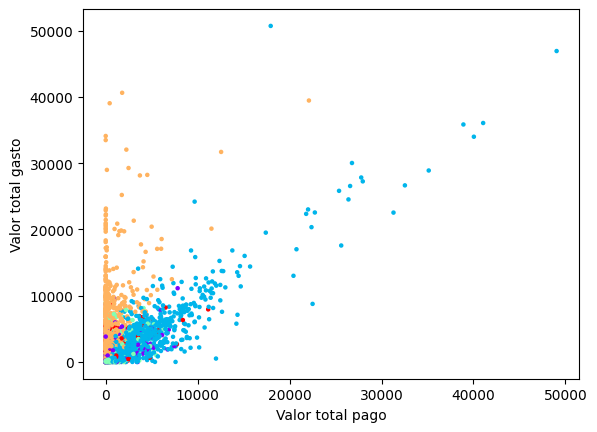

In [22]:
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

In [24]:
dados["cluster"] = labels
sns.pairplot(dados[0:], hue="cluster")

Output hidden; open in https://colab.research.google.com to view.

In [25]:
dados.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2650.0  3036.946177  2478.922442   6.824905  1255.154881   
1        1536.0  1141.865757  1664.809840   0.000000   212.178230   
2        3279.0   443.776995   846.525522   0.000000    23.340435   
3        1073.0  1795.328292  1982.485775   0.000000   507.076999   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2173.994774  4223.858877  18495.558550            2650.0  0.963514   
1         554.332740  1370.056708  19043.138560            1536.0  0.928220   
2          82.902896   410.659944   9630.367575            3279.0  0.774514   
3        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.541571   8345.641905           2650.0  0.001798   
1        ...       523.540210  18621.013310           1536.0  0.278331   
2        ...       248.766884   4483.503862           3279.0  0.246881   
3        ...       884.183626  21235.065300           1073.0  0.117430   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023256  0.0  0.0  0.000000  0.000000  0.6  
1        0.367137  0.0  0.0  0.083333  0.545455  1.0  
2        0.346775  0.0  0.0  0.000000  0.444444  1.0  
3        0.186772  0.0  0.0  0.083333  0.142857  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [26]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.03886149e-01 2.72144714e-04 6.15751915e-02 3.61893482e-02
  2.54075483e-02 2.53219709e-01 6.71312176e-05 2.56644637e-05
  4.48814714e-05 5.75359114e-05 1.15794119e-03 1.32612254e-03
  7.19404134e-01 1.66061928e-01 1.79050745e-01 5.79660872e-07]
 [1.60105064e-01 2.45216495e-04 4.38561405e-01 2.57200631e-01
  1.81532508e-01 2.58728121e-02 2.04312848e-04 8.90625500e-05
  1.50516286e-04 9.39341912e-06 1.69901859e-04 6.17654349e-03
  6.03940941e-01 4.02431241e-01 8.53054178e-02 7.19457109e-05]
 [6.89799575e-02 2.30763006e-04 1.21587120e-01 4.79794677e-02
  7.37079733e-02 2.40200669e-02 1.73016299e-04 3.36944404e-05
  1.40456777e-04 7.83464589e-06 1.22859223e-04 2.86637386e-03
  9.43639117e-01 1.53810130e-01 5.68564456e-02 7.61967577e-05]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [3.

In [27]:
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0541
PRC_FULL_PAYMENT 
0.0000


In [28]:
description = dados.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3036.946177   385.299102   1637.380994   4495.584906   968.775192   
1        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
2         443.776995   629.282729    140.652097   5130.892579   814.340168   
3        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045   

         n_clients  
cluster             
0             2650  
1             1536  
2             3279  
3             1073  
4              412  


<ipython-input-28-478f91b2a81e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dados.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


A ordem dos clusters pode estar invertida aqui, porém não tem problema, cada linha vai representar um cluster diferente.

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [30]:
dados.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2650.0,0.001798,0.023256,0.0,0.0,0.000000,0.000000,0.6
1,1536.0,0.278331,0.367137,0.0,0.0,0.083333,0.545455,1.0
2,3279.0,0.246881,0.346775,0.0,0.0,0.000000,0.444444,1.0
3,1073.0,0.117430,0.186772,0.0,0.0,0.083333,0.142857,1.0
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
